In [1]:
import sys
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing.preprocessing import load_and_split_data, TARGET_CLASSES
from src.evaluation.evaluate import evaluate_model

In [3]:
_, _, test_ds, _ = load_and_split_data(batch_size=32) # for evaluation we only use test ds

                     precision    recall  f1-score   support

              pizza       0.96      0.98      0.97       106
              sushi       0.97      0.95      0.96       122
              steak       0.96      0.96      0.96       112
spaghetti_bolognese       0.98      0.98      0.98       108

           accuracy                           0.97       448
          macro avg       0.97      0.97      0.97       448
       weighted avg       0.97      0.97      0.97       448



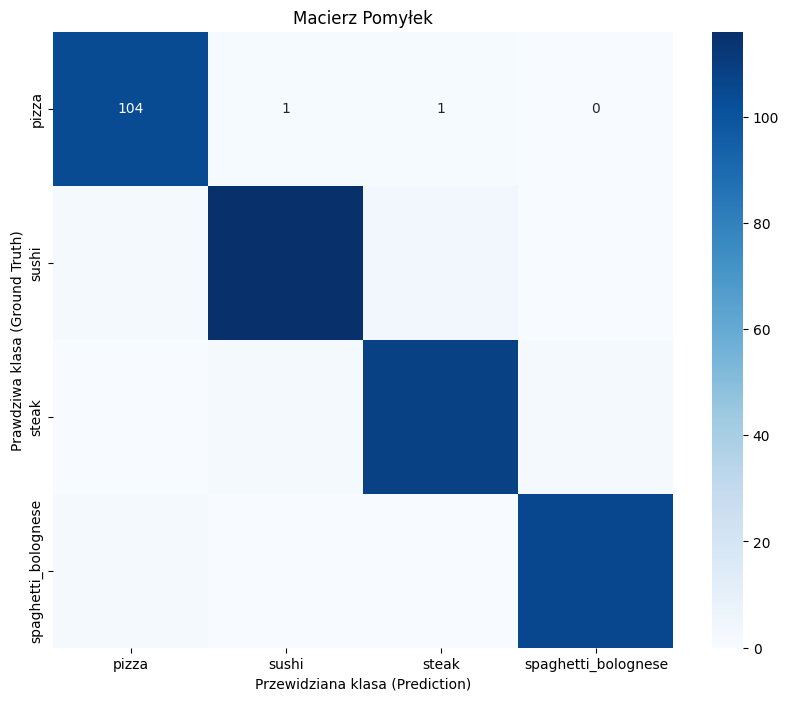

array([[104,   1,   1,   0],
       [  2, 116,   4,   0],
       [  0,   2, 108,   2],
       [  2,   0,   0, 106]], dtype=int64)

In [4]:
model_path = 'models/final_efficientnet_4class.h5'
model = load_model(model_path)
evaluate_model(model, test_ds, TARGET_CLASSES)